# Roteiro para Verificar e explorar dados.


1. Manipulação dos dados
2. Análise dos dados
3. Desenvolvimento do modelo
4. Produto em Power BI



In [1]:
#Importar bibliotecas mais usadas

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix

In [2]:
#puxando os dados em formato csv ou excel, usando o caminho onde foi salvo o arquivo.

#data = pd.read_csv('XXXXXXXXXXXXX.csv', header=(0))
data = pd.read_excel("C:\\Users\eduar\\3D Objects\\OneDrive\\Área de Trabalho\\opçõeswege2.xlsx", header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (110, 8)


,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7
5,WEGEC294,29.21,6400,0,700,7100,2,6
6,WEGEC299,29.71,500,0,20200,20700,2,6
7,WEGEC304,30.21,200,0,4100,4300,2,3
8,WEGEC307,30.46,500,0,110000,110500,3,7
9,WEGEC309,30.71,0,0,14700,14700,2,2


In [3]:
#Para acessarmos as 5 primeiras linhas:

data[:5]

,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7


In [5]:
# verificar dados nulos e tipo

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Série               110 non-null    object 
 1   Preço de Exercício  110 non-null    float64
 2   Coberto             110 non-null    int64  
 3   Trava               110 non-null    int64  
 4   Descoberto          110 non-null    int64  
 5   Total               110 non-null    int64  
 6   Titular             110 non-null    int64  
 7   Lançador            110 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 7.0+ KB


In [6]:
# descrição básica dos dados
data.describe()


,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
count,110.000000,1.100000e+02,110.000000,110.000000,1.100000e+02,110.000000,110.000000
mean,37.691000,2.081455e+04,14761.818182,25510.909091,6.108727e+04,9.627273,14.054545
std,6.406031,9.997393e+04,34214.799046,59103.459818,1.276093e+05,34.459885,22.176041
min,23.680000,0.000000e+00,0.000000,0.000000,1.000000e+02,1.000000,1.000000
25%,32.522500,0.000000e+00,0.000000,1000.000000,4.850000e+03,2.000000,2.000000
50%,38.055000,8.000000e+02,900.000000,5550.000000,1.530000e+04,3.000000,4.000000
75%,42.375000,7.675000e+03,12475.000000,20500.000000,5.212500e+04,6.000000,12.000000
max,53.430000,1.002000e+06,222900.000000,408100.000000,1.011000e+06,348.000000,103.000000


In [7]:
# remove as linhas com NaN
data = data.dropna(axis=0) 
data.head(25)

,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7
5,WEGEC294,29.21,6400,0,700,7100,2,6
6,WEGEC299,29.71,500,0,20200,20700,2,6
7,WEGEC304,30.21,200,0,4100,4300,2,3
8,WEGEC307,30.46,500,0,110000,110500,3,7
9,WEGEC309,30.71,0,0,14700,14700,2,2


In [8]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
105    False
106    False
107    False
108    False
109    False
Length: 110, dtype: bool

In [9]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
data.head(25)

,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7
5,WEGEC294,29.21,6400,0,700,7100,2,6
6,WEGEC299,29.71,500,0,20200,20700,2,6
7,WEGEC304,30.21,200,0,4100,4300,2,3
8,WEGEC307,30.46,500,0,110000,110500,3,7
9,WEGEC309,30.71,0,0,14700,14700,2,2


In [10]:
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7
5,WEGEC294,29.21,6400,0,700,7100,2,6
6,WEGEC299,29.71,500,0,20200,20700,2,6
7,WEGEC304,30.21,200,0,4100,4300,2,3
8,WEGEC307,30.46,500,0,110000,110500,3,7
9,WEGEC309,30.71,0,0,14700,14700,2,2


In [11]:
# Remove as linhas com Nan
data = data.dropna(axis=0) #axis=0: remove as linhas,axis=1: remove as colunas
data.head(25)

,Série,Preço de Exercício,Coberto,Trava,Descoberto,Total,Titular,Lançador
0,WEGEC259,25.71,600,5500,5500,11600,2,4
1,WEGEC269,26.71,0,0,1300,1300,1,3
2,WEGEC279,27.71,2000,1500,0,3500,2,3
3,WEGEC289,28.71,2500,0,400,2900,1,2
4,WEGEC292,28.96,0,0,26600,26600,2,7
5,WEGEC294,29.21,6400,0,700,7100,2,6
6,WEGEC299,29.71,500,0,20200,20700,2,6
7,WEGEC304,30.21,200,0,4100,4300,2,3
8,WEGEC307,30.46,500,0,110000,110500,3,7
9,WEGEC309,30.71,0,0,14700,14700,2,2


In [12]:
# Remove as linhas especificadas
data = data.drop(data.columns[[1, 3]], axis=1)
data.head(25)

,Série,Coberto,Descoberto,Total,Titular,Lançador
0,WEGEC259,600,5500,11600,2,4
1,WEGEC269,0,1300,1300,1,3
2,WEGEC279,2000,0,3500,2,3
3,WEGEC289,2500,400,2900,1,2
4,WEGEC292,0,26600,26600,2,7
5,WEGEC294,6400,700,7100,2,6
6,WEGEC299,500,20200,20700,2,6
7,WEGEC304,200,4100,4300,2,3
8,WEGEC307,500,110000,110500,3,7
9,WEGEC309,0,14700,14700,2,2


In [ ]:
#Para remover a primeira e terceira linhas:
#data = data.drop(data.index[[0, 2]], axis=0)
#data.head(25)


## Substituição de valores ausentes

Em muitas siutações, a matriz de atributos pode conter valores ausentes. Nesse caso, podemos usar diferentes métodos para substituir tais valores, como preenche-los com valores médios ou medianas.
Vamos ler os dados novamente:

In [ ]:
#data = pd.read_csv('XXXXXXXXXXXXXXXXXXX.csv', header=(0))
print(data.shape)
data.head(25)

In [13]:
#Vamos substituir os valores com 'NaN' e '?' pelos valores médios dos atributos. 
#Primeiramente, mudamos as entradas '?' para 'NaN', como foi feito anteriormente.

#data = data.replace('?', np.nan)
#data.head(25)



In [15]:
#A seguir, inserimos a média de cada atributo nas entradas com valores 'NaN'.

# convertemos para o formato Numpy e ignoramos a última coluna (classe)
#X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float) 
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
#averages = np.nanmean(X, axis = 0) 
#for i in np.arange(0, X.shape[0]):
    #for j in np.arange(0, X.shape[1]):
        #if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            #X[i,j] = averages[j] # insere a média
#print(X)

In [16]:
#Exemplo de como renomear colunas 

# Renomear as colunas
data = data.rename(columns={
    "Unnamed: 0": "Opção",
    "Unnamed: 1": "Strike",
    "Coberto": "Coberto",
    "Trava": "Trava",
    "Descoberto": "Descoberto",
    "Total": "Total",
    "Titular": "Titular",
    "Lançador": "Lançador"
})

print("Número de linhas e colunas:", data.shape)
print(data.head(100))

Número de linhas e colunas: (110, 6)
       Série  Coberto  Descoberto  Total  Titular  Lançador
0   WEGEC259      600        5500  11600        2         4
1   WEGEC269        0        1300   1300        1         3
2   WEGEC279     2000           0   3500        2         3
3   WEGEC289     2500         400   2900        1         2
4   WEGEC292        0       26600  26600        2         7
..       ...      ...         ...    ...      ...       ...
95  WEGED416        0        1000   1000        1         1
96  WEGED419    11500       38800  51600        6        24
97  WEGED421      200        9600   9800        3         5
98  WEGED426        0         200    200        1         1
99  WEGED429     2500       15100  18100        6        14

[100 rows x 6 columns]


Número de linhas e colunas: (110, 8)


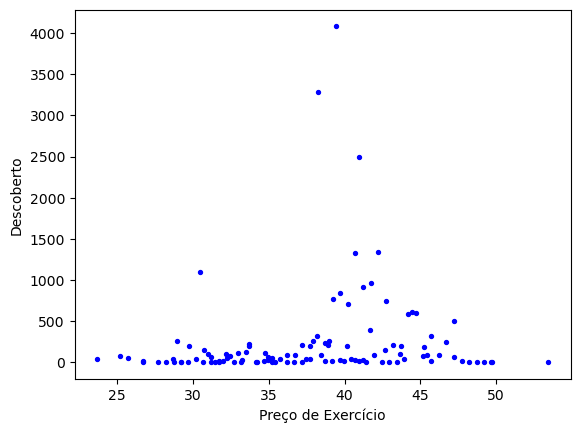

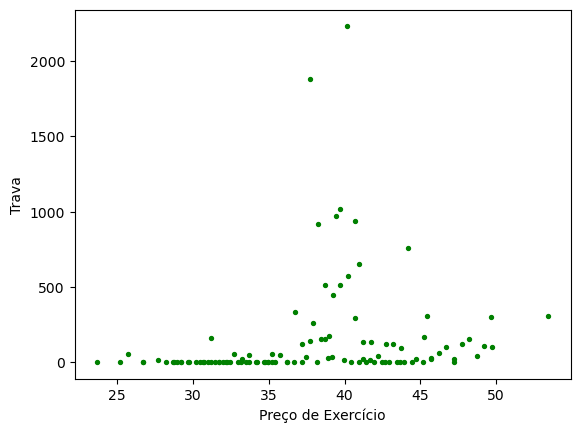

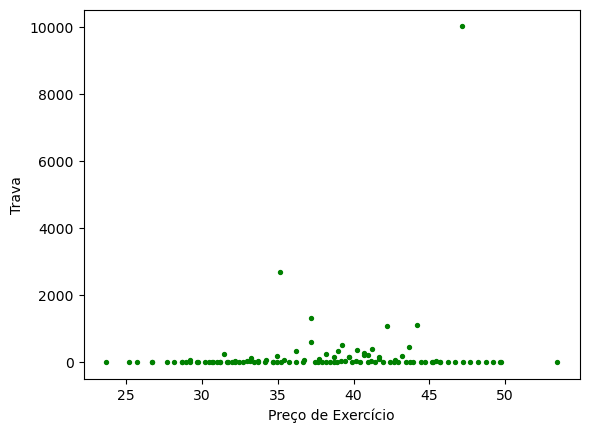

In [19]:
data = pd.read_excel("C:\\Users\eduar\\3D Objects\\OneDrive\\Área de Trabalho\\opçõeswege2.xlsx", header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

# criação dos vetores
x = data['Preço de Exercício'].values
y = data['Descoberto'].values / 100
z = data['Trava'].values / 100
k = data['Coberto'].values/ 100
# plotagem do gráfico
#plt.plot(y, x, 'bo')
plt.scatter(x, y, color = "b", marker = "o", s = 8) 

  
plt.xlabel('Preço de Exercício')
plt.ylabel("Descoberto")
plt.show()


plt.scatter(x, z, color = "g", marker = "o", s = 8)
plt.xlabel('Preço de Exercício')
plt.ylabel('Trava')
plt.show()

plt.scatter(x, k, color = "g", marker = "o", s = 8)
plt.xlabel('Preço de Exercício')
plt.ylabel('Trava')
plt.show()


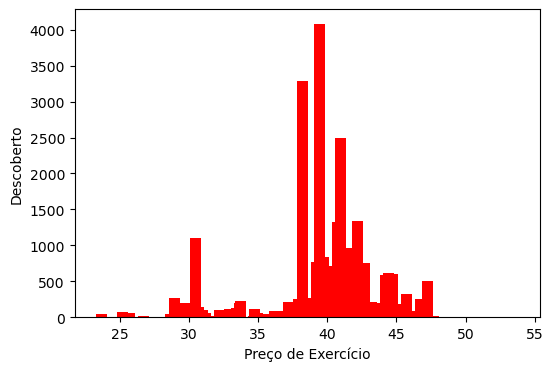

In [25]:
x = data['Preço de Exercício'].values
y = data['Descoberto'].values / 100
z = data['Trava'].values/100
k = data['Coberto'].values/100
# plotagem do gráfico
plt.figure(figsize=(6,4))
plt.bar(x, y, color = "r") 
#plt.barh(x, y, color = "b")
  
plt.xlabel('Preço de Exercício')
plt.ylabel("Descoberto")
plt.show()

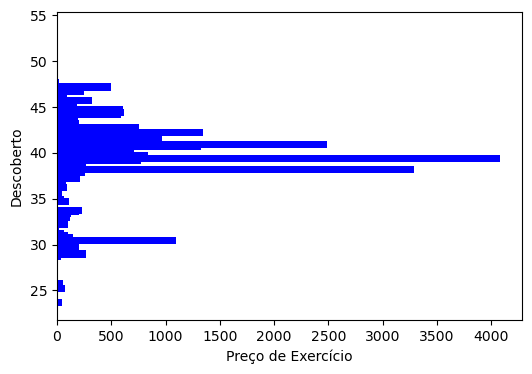

In [24]:
x = data['Preço de Exercício'].values
y = data['Descoberto'].values / 100
z = data['Trava'].values/100
k = data['Coberto'].values/100
# plotagem do gráfico
plt.figure(figsize=(6,4))
#plt.bar(x, y, color = "g") 
plt.barh(x, y, color = "b")
  
plt.xlabel('Preço de Exercício')
plt.ylabel("Descoberto")
plt.show()

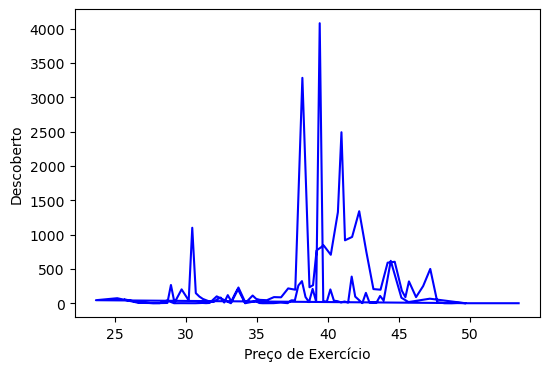

In [23]:
x = data['Preço de Exercício'].values
y = data['Descoberto'].values / 100
z = data['Trava'].values/100
k = data['Coberto'].values/100
# plotagem do gráfico
plt.figure(figsize=(6,4))
#plt.bar(x, y, color = "g") 
plt.plot(x, y, color = "b")
  
plt.xlabel('Preço de Exercício')
plt.ylabel("Descoberto")
plt.show()

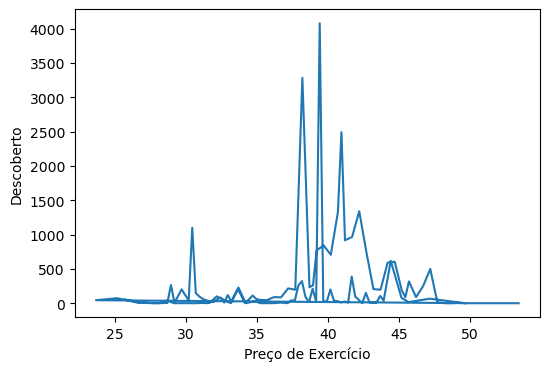

In [32]:
x = data['Preço de Exercício'].values
y = data['Descoberto'].values / 100
z = data['Trava'].values/100
k = data['Coberto'].values/100

plt.figure(figsize=(6,4))
plt.plot(x, y )
  
plt.xlabel('Preço de Exercício')
plt.ylabel("Descoberto")
plt.show(True)

